In [2]:
import pandas as pd
import numpy as np

%store -r BND2021
BND2021

,Day,BZN|NL > BZN|GB [MW],BZN|GB > BZN|NL [MW]
0,01.01.2021 00:00 - 01.01.2021 01:00,6.0,0.0
1,02.01.2021 00:00 - 02.01.2021 01:00,0.0,4.0
2,03.01.2021 00:00 - 03.01.2021 01:00,0.0,3.0
3,04.01.2021 00:00 - 04.01.2021 01:00,17.0,0.0
4,05.01.2021 00:00 - 05.01.2021 01:00,11.0,2.0
...,...,...,...
360,27.12.2021 00:00 - 27.12.2021 01:00,21804.0,0.0
361,28.12.2021 00:00 - 28.12.2021 01:00,25781.0,0.0
362,29.12.2021 00:00 - 29.12.2021 01:00,15893.0,2870.0
363,30.12.2021 00:00 - 30.12.2021 01:00,17030.0,2254.0


In [3]:
%store -r BND2022
BND2022

,Day,BZN|NL > BZN|GB [MW],BZN|GB > BZN|NL [MW]
0,01.01.2022 00:00 - 01.01.2022 01:00,5707.00,8733.00
1,02.01.2022 00:00 - 02.01.2022 00:15,11028.50,5836.75
2,03.01.2022 00:00 - 03.01.2022 00:15,7443.75,6192.50
3,04.01.2022 00:00 - 04.01.2022 00:15,9228.00,574.25
4,05.01.2022 00:00 - 05.01.2022 00:15,19060.25,0.00
...,...,...,...
360,27.12.2022 00:00 - 27.12.2022 00:15,11414.75,1814.75
361,28.12.2022 00:00 - 28.12.2022 00:15,14637.75,3466.50
362,29.12.2022 00:00 - 29.12.2022 00:15,11404.50,3978.00
363,30.12.2022 00:00 - 30.12.2022 00:15,5097.00,7499.00


In [10]:
BNDFlows = pd.concat([BND2021["BZN|NL > BZN|GB [MW]"], BND2022["BZN|NL > BZN|GB [MW]"]], ignore_index=True).to_frame("BZN|NL > BZN|GB [MW]")
BNDFlows["BZN|GB > BZN|NL [MW]"] = pd.concat([BND2021["BZN|GB > BZN|NL [MW]"], BND2022["BZN|GB > BZN|NL [MW]"]], ignore_index=True).to_frame("BZN|GB > BZN|NL [MW]")

BNDFlows["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "BZN|NL > BZN|GB [MW]", "BZN|GB > BZN|NL [MW]"]

BNDFlows = BNDFlows.reindex(columns=NewOrder)

print(BNDFlows.to_string())
print("Max Import:", max(BNDFlows["BZN|NL > BZN|GB [MW]"]))
print("Max Export:", max(BNDFlows["BZN|GB > BZN|NL [MW]"]))

          Date  BZN|NL > BZN|GB [MW]  BZN|GB > BZN|NL [MW]
0   2021-01-01                  6.00                  0.00
1   2021-01-02                  0.00                  4.00
2   2021-01-03                  0.00                  3.00
3   2021-01-04                 17.00                  0.00
4   2021-01-05                 11.00                  2.00
5   2021-01-06                 14.00                  0.00
6   2021-01-07                 15.00                  0.00
7   2021-01-08                 16.00                  1.00
8   2021-01-09                  0.00                  1.00
9   2021-01-10                  0.00                  0.00
10  2021-01-11                  8.00                  0.00
11  2021-01-12                  2.00                  4.00
12  2021-01-13                  0.00                  4.00
13  2021-01-14                  9.00                  1.00
14  2021-01-15                  8.00                  0.00
15  2021-01-16                  1.00                  0.

(18591.55, 19393.45)


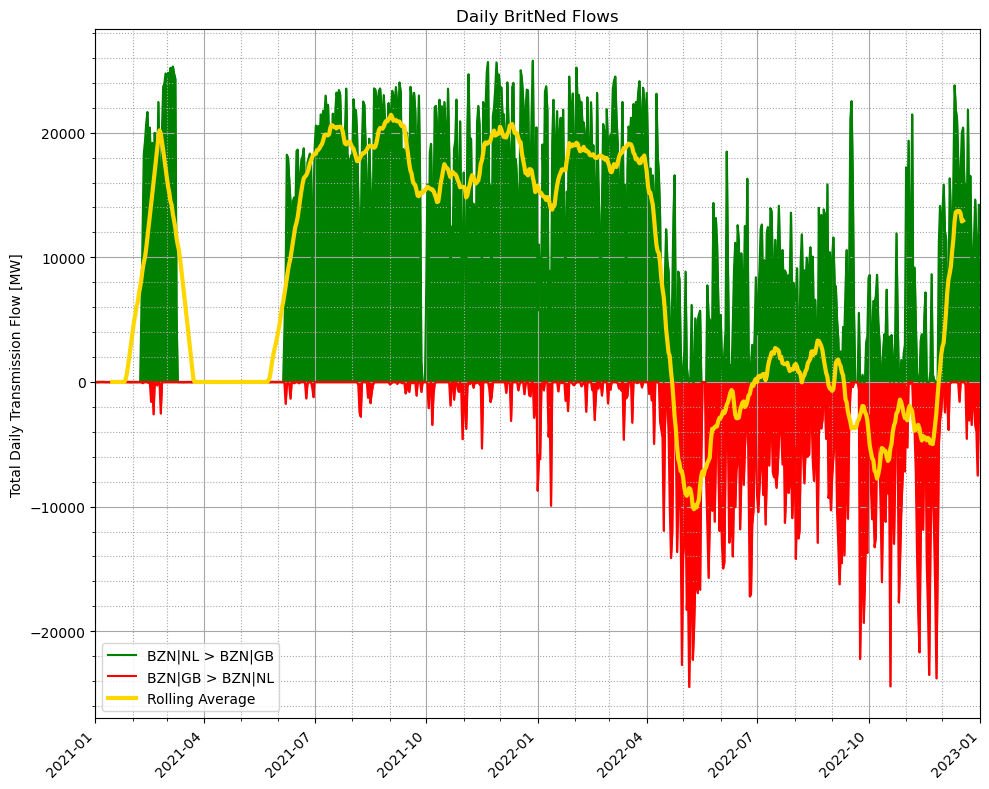

In [8]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('Daily BritNed Flows')
plt.ylabel('Total Daily Transmission Flow [MW]')

Mean = (BNDFlows["BZN|NL > BZN|GB [MW]"] - BNDFlows["BZN|GB > BZN|NL [MW]"])/2
Sum = BNDFlows["BZN|NL > BZN|GB [MW]"] - BNDFlows["BZN|GB > BZN|NL [MW]"]

ax.plot(BNDFlows["Date"], BNDFlows["BZN|NL > BZN|GB [MW]"], color="green", label="BZN|NL > BZN|GB")
ax.plot(BNDFlows["Date"], -BNDFlows["BZN|GB > BZN|NL [MW]"], color="red", label="BZN|GB > BZN|NL")
ax.plot(BNDFlows["Date"], Sum.rolling(28,  center=True).mean(), linewidth = 3, color = "gold", label="Rolling Average")


plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_xlim())

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.tight_layout()

plt.fill_between(BNDFlows["Date"], BNDFlows["BZN|NL > BZN|GB [MW]"], color="green")
plt.fill_between(BNDFlows["Date"], -BNDFlows["BZN|GB > BZN|NL [MW]"], color="red")

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()

In [ ]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('Total Interconnector Flows')
plt.ylabel('Daily Interconnector Flows (MWh)')

Mean = (ImportData["Total Imports"] - ExportData["Total Exports"])/math.sqrt(2)
Sum = ImportData["Total Imports"] - ExportData["Total Exports"]

ax.plot(ImportData["Date"], ImportData["Total Imports"], color="darkgreen", label="Imports")
ax.plot(ExportData["Date"], -ExportData["Total Exports"], color="firebrick", label="Exports")
ax.plot(ImportData["Date"], Sum.rolling(28,  center=True).mean(), linewidth = 3, color = "gold", label="Rolling Average")
#ax.plot(ImportData["Date"], Mean, label="RMS", color='black')


plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_xlim())

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.tight_layout()

plt.fill_between(ImportData["Date"], ImportData["Total Imports"], color="darkgreen")
plt.fill_between(ExportData["Date"], -ExportData["Total Exports"], color="firebrick")

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()